<a href="https://colab.research.google.com/github/robitussin/CCINSYSL_EXAM/blob/main/exam_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Exam 💙 💛

Instructions ❗️❗️

❌ Do not remove or modify the notebook sections, subsections, exam questions or any text in this python notebook

✔️ Put your answer in the designated cells below each question

## K-Nearest Neighbor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [2]:
df = load_breast_cancer(as_frame=True)
df = df['frame']

1. Display the first 5 rows of the dataset. `(5 points)`

In [3]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


2. Display the general information of the dataset. `(5 points)`

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

3. Display the number of samples for each class/target in the dataset. `(5 points)`

In [22]:
df.value_counts()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  mean compactness  mean concavity  mean concave points  mean symmetry  mean fractal dimension  radius error  texture error  perimeter error  area error  smoothness error  compactness error  concavity error  concave points error  symmetry error  fractal dimension error  worst radius  worst texture  worst perimeter  worst area  worst smoothness  worst compactness  worst concavity  worst concave points  worst symmetry  worst fractal dimension  target
6.981        13.43         43.79           143.5      0.11700          0.07568           0.00000         0.00000              0.1930         0.07818                 0.2241        1.5080         1.553            9.833       0.010190          0.010840           0.00000          0.000000              0.02659         0.004100                 7.93          19.54          50.41            185.2       0.1584            0.12020            0.00000          0.00000               0.29

In [21]:
mean_features = ['mean radius','mean texture','mean perimeter','mean area','mean smoothness', 'mean compactness', 'mean concavity','mean concave points', 'mean symmetry', 'mean fractal dimension']
df[mean_features]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


4. Using the mean features of the dataset, display the **correlation** of all the mean features in the dataset. `(5 points)`

In [24]:
correlation = df[mean_features]
print(correlation.corr())

                        mean radius  mean texture  mean perimeter  mean area  \
mean radius                1.000000      0.323782        0.997855   0.987357   
mean texture               0.323782      1.000000        0.329533   0.321086   
mean perimeter             0.997855      0.329533        1.000000   0.986507   
mean area                  0.987357      0.321086        0.986507   1.000000   
mean smoothness            0.170581     -0.023389        0.207278   0.177028   
mean compactness           0.506124      0.236702        0.556936   0.498502   
mean concavity             0.676764      0.302418        0.716136   0.685983   
mean concave points        0.822529      0.293464        0.850977   0.823269   
mean symmetry              0.147741      0.071401        0.183027   0.151293   
mean fractal dimension    -0.311631     -0.076437       -0.261477  -0.283110   

                        mean smoothness  mean compactness  mean concavity  \
mean radius                    0.170581   

5. Draw a heatmap between all mean features of the dataset. `(5 points)`

<Axes: >

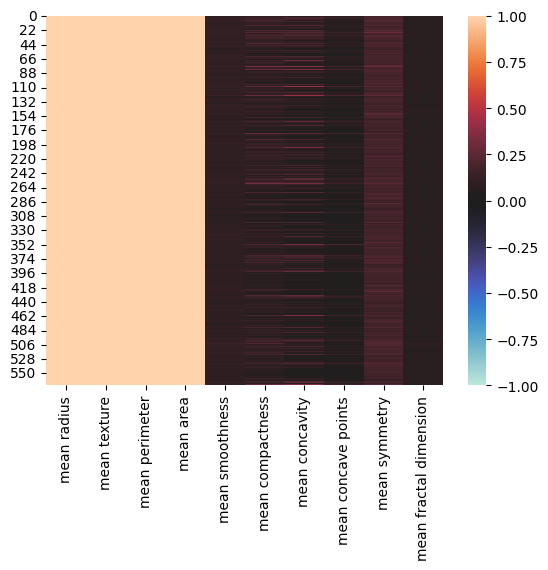

In [25]:
sns.heatmap(correlation, vmin=-1, vmax=1, center=0)

6. Split the data set into a training and test set. `(5 points)`

In [35]:
# Array of features
X = df.drop(columns=['target']).values

# Array of Labels
y = df['target'].values

7. Create a new instance of the `KNeighborsClassifier` class and set your K parameter. `(5 points)`

In [34]:
knn = KNeighborsClassifier(n_neighbors=20)

8. Use the `fit()` method to train the KNN model. `(5 points)`

In [37]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=20)

9. Use the `predict()` method to make predictions using the test set. `(5 points)`

In [39]:
y_pred = knn.predict(X)
metrics.accuracy_score(y, y_pred)

0.9367311072056239

10. Use the `accuracy_score()` method to get the accuracy of the KNN model. `(5 points)`

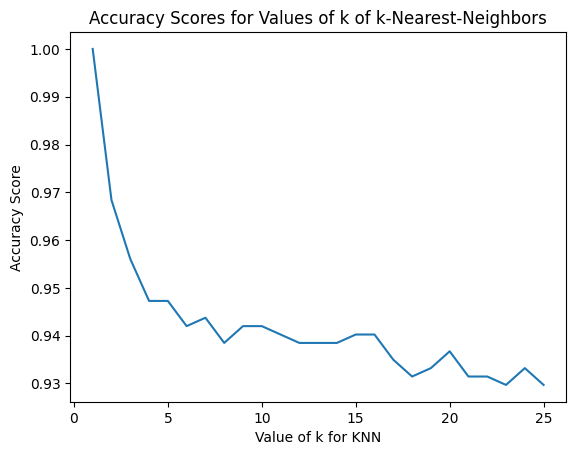

In [45]:
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X, y)

    # Test the model
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()
